# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Pada project ini, saya akan melakukan scrapping data dari sebuah job portal, yaitu Kalibrr. Kalibrr adalah sebuah job platform yang cukup populer di Indonesia. Tujuan saya melakukan scrapping data dari Kalibrr adalah untuk memperoleh insight menegnai eprsebaran lowongan pekerjaan berdasarkan lokasi.

## Requesting the Data and Extracting the Right Information Using For Loop
Requesting the data with `get` method and put the key into the `.find()`.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = f"https://www.kalibrr.id/id-ID/job-board/te/data/1"
response = requests.get(url)
response = response.content
soup = BeautifulSoup(response, 'html.parser')
table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
print(table.prettify()[1:1000])

div class="k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg">
 <div class="k-bg-white k-divide-y k-divide-solid k-divide-tertiary-ghost-color" itemscope="" itemtype="http://schema.org/ItemList">
  <style data-emotion="css 1b4vug6">
   .css-1b4vug6{grid-template-columns:5rem 1rem auto 1rem max-content;grid-template-rows:auto 0.25rem auto;}
  </style>
  <div class="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6" itemprop="itemListElement" itemscope="" itemtype="http://schema.org/ListItem">
   <a class="k-bg-white k-flex k-items-center k-flex-shrink k-justify-center k-text-4xl k-text-subdued k-overflow-hidden k-px-4 k-py-2 k-row-span-4" href="/id-ID/c/pgi-data/jobs">
    <div>
     <img alt="PGI Data" class="k-block k-max-w-full k-max-h-full k-bg-white k-mx-auto" decoding="async" height="80" loading="eager" src="https://rec-data.kalibrr.com/www.kalibrr.com/logos/Z7AL3F4XGKPLCEW9TFDFDZK33247MQ8J9PSHES26-6080167


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

jobs = []

for i in range(0,16):
    url = f"https://www.kalibrr.id/id-ID/job-board/te/data/{i}"
    response = requests.get(url)
    response = response.content
    soup = BeautifulSoup(response, 'html.parser')
    table = soup.find('div', attrs={'class':'k-border-b k-border-t k-border-tertiary-ghost-color md:k-border md:k-overflow-hidden md:k-rounded-lg'})
    rows = table.find_all('div', attrs={'class':'k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6'})
    for row in rows:
        title = row.find('a', attrs={'class':'k-text-primary-color'}).text
        location = row.find('a', attrs={'class':'k-text-subdued k-block'}).text
        posted_deadline = row.find('span', attrs={'class':'k-block k-mb-1'}).text
        company = row.find_all('a', attrs={'class':'k-text-subdued'})[1].text
        jobs.append([title, location, posted_deadline, company])

In [4]:
jobs[:5]

[['DevOps and Data Engineer',
  'Tangerang Selatan, Indonesia',
  'Posted 11 days ago • Apply before 13 May',
  'Mobius Digital'],
 ['Network  Security Engineer',
  'Jakarta, Indonesia',
  'Posted 10 days ago • Apply before 19 Apr',
  'PGI Data'],
 ['Data Entry',
  'South Jakarta, Indonesia',
  'Posted 15 days ago • Apply before 30 May',
  'PT. Royal Trust'],
 ['Data Quality Analyst',
  'Central Jakarta City, Indonesia',
  'Posted 12 days ago • Apply before 1 May',
  'Astra Financial'],
 ['Project Manager',
  'Jakarta, Indonesia',
  'Posted 12 days ago • Apply before 29 Jun',
  'PGI Data']]

Dari hasil scrapping data yang telah dilakukan, kita dapat memperoleh list lowongan pekerjaan beserta detail lainnya dalam suatu list yang kemudian akan diubah menjadi DataFrame.

In [5]:
df_jobs = pd.DataFrame(jobs, columns=['title', 'location', 'posted_deadline', 'company'])

## Creating data frame & Data wrangling

Put the array into dataframe

In [6]:
df_jobs = pd.DataFrame(jobs, columns=['title', 'location', 'posted_deadline', 'company'])
df_jobs.to_csv('jobs.csv')

In [7]:
df_jobs = pd.read_csv('jobs.csv')

In [8]:
df_jobs

,Unnamed: 0,title,location,posted_deadline,company
0,0,DevOps and Data Engineer,"Tangerang Selatan, Indonesia",Posted 11 days ago • Apply before 13 May,Mobius Digital
1,1,Network Security Engineer,"Jakarta, Indonesia",Posted 10 days ago • Apply before 19 Apr,PGI Data
2,2,Data Entry,"South Jakarta, Indonesia",Posted 15 days ago • Apply before 30 May,PT. Royal Trust
3,3,Data Quality Analyst,"Central Jakarta City, Indonesia",Posted 12 days ago • Apply before 1 May,Astra Financial
4,4,Project Manager,"Jakarta, Indonesia",Posted 12 days ago • Apply before 29 Jun,PGI Data
...,...,...,...,...,...
235,235,SALES ADMINISTRATION OFFICER,"Jakarta Timur, Indonesia",Posted 5 months ago • Apply before 30 May,Marga Nusantara Jaya
236,236,Digital Marketing Lead,"Bogor Kota, Indonesia",Posted 10 days ago • Apply before 30 May,PT Gema Mulia Semesta (SOUVIA)
237,237,Brand Communication Specialist,"Jakarta, Indonesia",Posted 9 days ago • Apply before 4 Jun,Renos.id
238,238,Back End (PHP) Developer [CONTRACT BASED],"Kota Jakarta Selatan, Indonesia",Posted a month ago • Apply before 24 May,Aleph Labs


Saya melakukan data cleaning dengan membagi kolom posted_deadline menjadi date_posted dan deadline, serta kolom location menjadi city dan state.

In [9]:
df_jobs[['date_posted', 'deadline']] = df_jobs.posted_deadline.str.split(' • Apply before ', expand = True)
df_jobs[['city', 'state']] = df_jobs.location.str.split(', ', expand = True)
df_jobs = df_jobs.drop(['Unnamed: 0', 'location', 'posted_deadline'], axis=1)
df_jobs['deadline'] = pd.to_datetime(df_jobs['deadline'] + " 2023")
df_jobs.head()

,title,company,date_posted,deadline,city,state
0,DevOps and Data Engineer,Mobius Digital,Posted 11 days ago,2023-05-13,Tangerang Selatan,Indonesia
1,Network Security Engineer,PGI Data,Posted 10 days ago,2023-04-19,Jakarta,Indonesia
2,Data Entry,PT. Royal Trust,Posted 15 days ago,2023-05-30,South Jakarta,Indonesia
3,Data Quality Analyst,Astra Financial,Posted 12 days ago,2023-05-01,Central Jakarta City,Indonesia
4,Project Manager,PGI Data,Posted 12 days ago,2023-06-29,Jakarta,Indonesia


In [10]:
df_jobs.loc[df_jobs['city'].str.contains('Jakarta'), 'city'] = 'Jakarta'
df_jobs.loc[df_jobs['city'].str.contains('Bandung'), 'city'] = 'Bandung'
df_jobs.loc[df_jobs['city'].str.contains('Bogor'), 'city'] = 'Bogor'
df_jobs.loc[df_jobs['city'].str.contains('Malang'), 'city'] = 'Malang'
df_jobs.loc[df_jobs['city'].str.contains('Tangerang'), 'city'] = 'Tangerang'
df_jobs.loc[df_jobs['city'].str.contains('Sukabumi'), 'city'] = 'Sukabumi'
df_jobs.loc[df_jobs['city'].str.contains('Surabaya'), 'city'] = 'Surabaya'
df_jobs.loc[df_jobs['city'].str.contains('Semarang'), 'city'] = 'Semarang'
df_jobs.loc[df_jobs['city'].str.contains('Lombok'), 'city'] = 'Lombok'

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

#### Jobs Available in Indonesia

In [11]:
import plotnine
from plotnine import *

In [12]:
city = df_jobs.groupby('city').count()

<AxesSubplot:xlabel='city'>

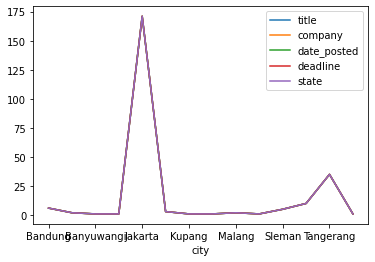

In [13]:
city.plot()

In [14]:
city = df_jobs.groupby('city').count()['title'].reset_index().sort_values(by='title', ascending=True)
city_list = city['city'].tolist()

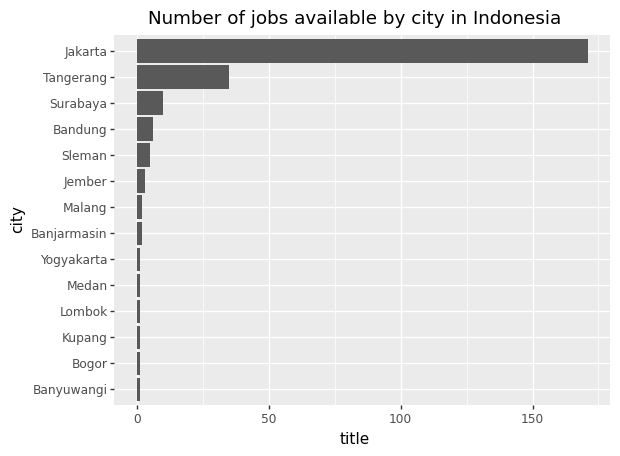

<ggplot: (182372592912)>

In [15]:
(ggplot(city, aes(x='city', y='title'))
+ plotnine.geom_bar(stat='identity')
+ plotnine.labs(title='Number of jobs available by city in Indonesia')
+ scale_x_discrete(limits=city_list)
+ coord_flip())

Jumlah lowongan yang ada di Kalibrr di Indonesia di dominasi oleh Jakarta dan Tangerang.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.